In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygmt
from datetime import datetime, timezone

# Feature Catalogs

In [2]:
p_feats = pd.read_csv("features/p_features.csv")
s_feats = pd.read_csv("features/s_features.csv")

In [3]:
p_feats.columns

Index(['arrival_identifier', 'avg_noise_1.00', 'avg_noise_10.00',
       'avg_noise_11.00', 'avg_noise_12.00', 'avg_noise_13.00',
       'avg_noise_14.00', 'avg_noise_15.00', 'avg_noise_16.00',
       'avg_noise_17.00', 'avg_noise_18.00', 'avg_noise_2.00',
       'avg_noise_3.00', 'avg_noise_4.00', 'avg_noise_5.00', 'avg_noise_6.00',
       'avg_noise_7.00', 'avg_noise_8.00', 'avg_noise_9.00', 'avg_signal_1.00',
       'avg_signal_10.00', 'avg_signal_11.00', 'avg_signal_12.00',
       'avg_signal_13.00', 'avg_signal_14.00', 'avg_signal_15.00',
       'avg_signal_16.00', 'avg_signal_17.00', 'avg_signal_18.00',
       'avg_signal_2.00', 'avg_signal_3.00', 'avg_signal_4.00',
       'avg_signal_5.00', 'avg_signal_6.00', 'avg_signal_7.00',
       'avg_signal_8.00', 'avg_signal_9.00', 'channel', 'event_identifier',
       'location_code', 'magnitude', 'magnitude_type', 'network',
       'noise_dominant_amplitude', 'noise_dominant_frequency',
       'noise_maximum_value', 'noise_minimum_value

In [4]:
p_feats[['event_identifier', 'magnitude', 'magnitude_type']].head()

,event_identifier,magnitude,magnitude_type
0,60000622,0.83,l
1,60000622,0.83,l
2,60000622,0.83,l
3,60000622,0.83,l
4,60001352,2.06,l


In [5]:
# All events in feature catalog have mag type M_L
p_feats['magnitude_type'].unique()

array(['l'], dtype=object)

# Event Catalogs

In [6]:
# Keith's yellowstone cat - goes from 11/08/1972 - 6/30/2022
ys_cat = pd.read_csv('catalogs/cat.yellow_long', delim_whitespace=True)
ys_cat.head()

,Date,Time,Lat,Lon,Dep,Mw,Ml,Mc,Mpref,N,Dmin,Gap,ehr,ehz,rms,evid
0,1972/11/08,09:54:28.71,44.5765,-110.6748,3.37,-9.99,-9.99,2.90,2.90,8,16.6,80,0.1,0.4,0.10,0
1,1973/01/04,01:33:08.05,44.8963,-110.7607,5.80,-9.99,-9.99,1.12,1.12,5,10.8,163,0.5,0.6,0.10,0
2,1973/01/06,13:33:06.03,44.8048,-110.4698,3.86,-9.99,-9.99,1.42,1.42,6,25.6,181,0.2,0.6,0.06,0
3,1973/01/07,02:10:33.13,44.5073,-111.1687,6.29,-9.99,-9.99,0.28,0.28,7,26.7,261,0.3,1.6,0.10,0
4,1973/01/07,06:55:54.10,44.7930,-111.5417,11.72,-9.99,-9.99,1.70,1.70,9,34.3,288,0.1,2.0,0.08,0


In [8]:
ys_cat.tail()

,Date,Time,Lat,Lon,Dep,Mw,Ml,Mc,Mpref,N,Dmin,Gap,ehr,ehz,rms,evid
57093,2022/06/29,22:22:02.13,44.3033,-110.9977,8.24,-9.99,-9.99,1.73,1.73,11,16.0,130,2.9,0.5,0.15,60503952
57094,2022/06/30,01:35:48.94,44.8735,-110.6520,2.16,-9.99,-9.99,0.91,0.91,8,17.0,187,7.1,1.7,0.13,60503987
57095,2022/06/30,12:08:45.18,44.8027,-110.7982,7.42,-9.99,-9.99,0.26,0.26,8,4.0,215,1.2,0.7,0.09,60504047
57096,2022/06/30,14:08:13.85,44.6745,-110.0488,13.44,-9.99,-9.99,0.83,0.83,10,11.0,93,1.1,0.7,0.14,60504057
57097,2022/06/30,23:17:31.52,44.0623,-110.2425,12.11,-9.99,-9.99,1.27,1.27,9,14.0,142,2.5,0.9,0.09,60504132


In [7]:
# YS arrivals catalog made from Ben's catalogs - goes from 01/01/2002 to 06/30/2022 
ys_arrs = pd.read_csv('catalogs/yellowstone_arrivals_2002_20220701.csv')
ys_arrs.head()

/tmp/ipykernel_409245/3912620786.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ys_arrs = pd.read_csv('catalogs/yellowstone_arrivals_2002_20220701.csv')


,evid,network,station,location,channelz,phase,arrival_id,arrival_time,pick_quality,first_motion,...,event_depth,origin_time,magnitude,magnitude_type,rflag,n_weighted_residuals,horizontal_error,azimuthal_gap,weighted_rms,utc
0,50251605,WY,MCID,1,EHZ,P,NaN,1.009880e+09,0.75,0,...,9.81,1.009880e+09,0.12,d,F,11.0,0.85,136.0,0.15,2002-01-01T10:05:51.940000Z
1,50251605,WY,YPM,1,EHZ,P,NaN,1.009880e+09,0.75,0,...,9.81,1.009880e+09,0.12,d,F,11.0,0.85,136.0,0.15,2002-01-01T10:05:51.940000Z
2,50251605,WY,YDC,1,EHZ,P,NaN,1.009880e+09,0.75,0,...,9.81,1.009880e+09,0.12,d,F,11.0,0.85,136.0,0.15,2002-01-01T10:05:51.940000Z
3,50251605,WY,YWB,1,EHZ,P,NaN,1.009880e+09,1.00,1,...,9.81,1.009880e+09,0.12,d,F,11.0,0.85,136.0,0.15,2002-01-01T10:05:51.940000Z
4,50251605,WY,YMC,1,EHZ,P,NaN,1.009880e+09,1.00,-1,...,9.81,1.009880e+09,0.12,d,F,11.0,0.85,136.0,0.15,2002-01-01T10:05:51.940000Z


In [9]:
ys_arrs.columns

Index(['evid', 'network', 'station', 'location', 'channelz', 'phase',
       'arrival_id', 'arrival_time', 'pick_quality', 'first_motion',
       'take_off_angle', 'source_receiver_distance', 'source_receiver_azimuth',
       'travel_time_residual', 'receiver_lat', 'receiver_lon', 'receiver_elev',
       'event_lat', 'event_lon', 'event_depth', 'origin_time', 'magnitude',
       'magnitude_type', 'rflag', 'n_weighted_residuals', 'horizontal_error',
       'azimuthal_gap', 'weighted_rms', 'utc'],
      dtype='object')

In [11]:
# Event catalog made from arrivals catalog - goes from 01/01/2002 to 06/30/2022
ys_arrs_evs = ys_arrs.drop_duplicates('evid')
ys_arrs_evs = ys_arrs_evs.rename(columns={"evid":"event_identifier"})
ys_arrs_evs = ys_arrs_evs[['event_identifier','event_lat', 'event_lon', 'event_depth', 'origin_time', 'magnitude',
       'magnitude_type', 'rflag', 'n_weighted_residuals', 'horizontal_error',
       'azimuthal_gap', 'weighted_rms', 'utc']]
ys_arrs_evs.head()

,event_identifier,event_lat,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,n_weighted_residuals,horizontal_error,azimuthal_gap,weighted_rms,utc
0,50251605,44.767333,-111.128667,9.81,1.009880e+09,0.12,d,F,11.0,0.85,136.0,0.15,2002-01-01T10:05:51.940000Z
11,50251610,44.801667,-111.026667,6.57,1.009881e+09,0.97,d,F,15.0,0.49,149.0,0.13,2002-01-01T10:32:42.550000Z
26,50251615,44.804000,-111.021833,7.71,1.009881e+09,-0.14,d,F,9.0,0.64,194.0,0.13,2002-01-01T10:33:09.740000Z
35,50251640,44.217833,-110.388500,7.61,1.009948e+09,1.60,d,F,10.0,1.09,245.0,0.07,2002-01-02T05:02:47.450000Z
45,50251650,44.817000,-111.046667,7.38,1.009957e+09,0.50,d,F,12.0,0.65,217.0,0.10,2002-01-02T07:36:01.680000Z


In [12]:
ys_arrs_evs.tail()

,event_identifier,event_lat,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,n_weighted_residuals,horizontal_error,azimuthal_gap,weighted_rms,utc
409588,60503952,44.303333,-110.997667,8.24,1.656541e+09,1.73,d,F,NaN,NaN,NaN,NaN,2022-06-29T22:22:02.130000Z
409597,60503987,44.873500,-110.652000,2.16,1.656553e+09,0.91,d,F,NaN,NaN,NaN,NaN,2022-06-30T01:35:48.939998Z
409605,60504047,44.802667,-110.798167,7.42,1.656591e+09,0.26,d,F,NaN,NaN,NaN,NaN,2022-06-30T12:08:45.180001Z
409613,60504057,44.674500,-110.048833,13.44,1.656598e+09,0.83,d,F,NaN,NaN,NaN,NaN,2022-06-30T14:08:13.849999Z
409623,60504132,44.062333,-110.242500,12.11,1.656631e+09,1.27,d,F,NaN,NaN,NaN,NaN,2022-06-30T23:17:31.519998Z


## The feature magnitudes are from the UUSS catalog

In [13]:
mag_comp_df = p_feats.drop_duplicates('event_identifier')[['event_identifier', 'magnitude', 'magnitude_type']].merge(ys_arrs_evs[['event_identifier', 'magnitude', 'magnitude_type']], how='left', on='event_identifier')

In [14]:
mag_comp_df

,event_identifier,magnitude_x,magnitude_type_x,magnitude_y,magnitude_type_y
0,60000622,0.83,l,0.83,l
1,60001352,2.06,l,2.06,l
2,60001357,1.97,l,1.97,l
3,60001367,2.03,l,2.03,l
4,60001372,2.52,l,2.52,l
...,...,...,...,...,...
6410,60456897,1.93,l,1.93,l
6411,60456907,3.03,l,3.03,l
6412,60461512,1.40,l,1.40,l
6413,60467157,1.37,l,1.37,l


In [15]:
(mag_comp_df['magnitude_x'] - mag_comp_df['magnitude_y']).unique()

array([0.])

In [16]:
np.array_equal(mag_comp_df['magnitude_x'], mag_comp_df['magnitude_y'])

True

# Get feature catalog dates

In [28]:
ys_arrs_evs[ys_arrs_evs['event_identifier'].isin(p_feats['event_identifier'].iloc[[0, -1]].values)][['utc', 'origin_time']].values

array([['2012-10-07T00:32:04.740000Z', 1349569924.74],
       ['2021-12-31T20:05:50.239998Z', 1640981150.24]], dtype=object)

In [35]:
# How to convert epoch time to utc with datetime
datetime.fromtimestamp(1349569924.74, tz=timezone.utc)

datetime.datetime(2012, 10, 7, 0, 32, 4, 740000, tzinfo=datetime.timezone.utc)

In [37]:
# How to convert utc time to epoch time
datetime(2012, 10, 7, 0, 32, 4, 740000, tzinfo=timezone.utc).timestamp()

1349569924.74

# Look at catalog info for part of 2022

In [40]:
unix2022 = datetime(2022, 1, 1, tzinfo=timezone.utc).timestamp()

In [49]:
# There are 787 YS events between 2022/01/01 and 2022/07/01 but only 182 with an M_L. Can still get new M_L for those events though
print(len(ys_arrs_evs[(ys_arrs_evs['origin_time'] > unix2022)]))
print(len(ys_arrs_evs[(ys_arrs_evs['origin_time'] > unix2022) & (ys_arrs_evs['magnitude_type'] == "l")]))

787
182


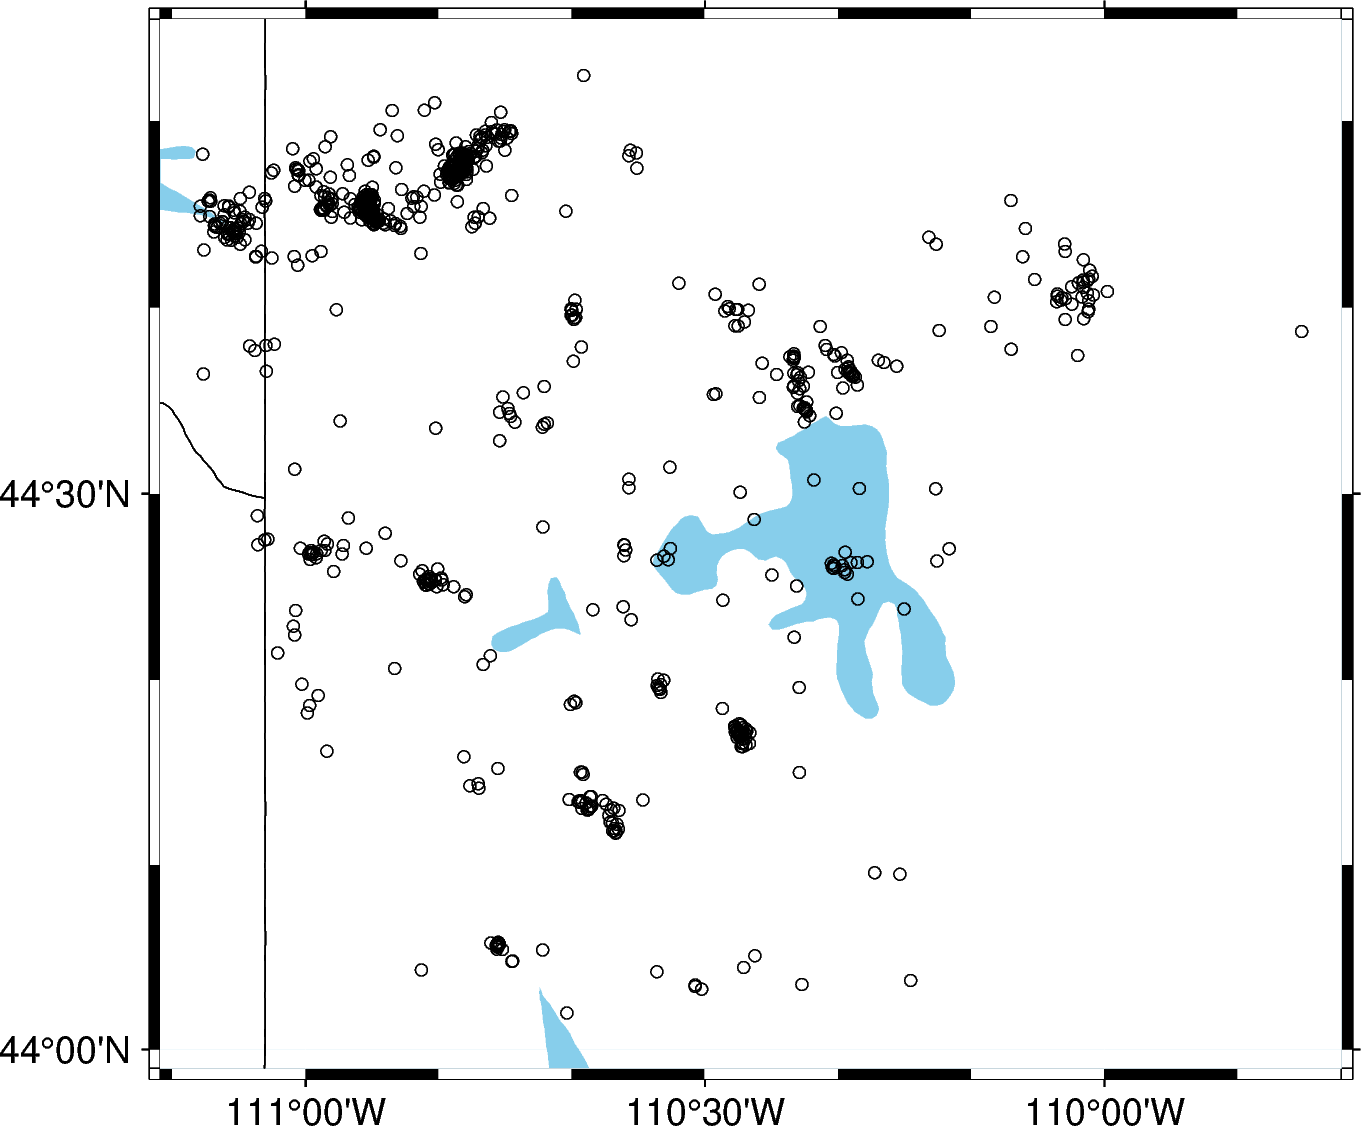

In [44]:
#Draw event map 
region = [
ys_arrs_evs[ys_arrs_evs['origin_time'] > unix2022].event_lon.min() - 0.05,
ys_arrs_evs[ys_arrs_evs['origin_time'] > unix2022].event_lon.max() + 0.05,
ys_arrs_evs[ys_arrs_evs['origin_time'] > unix2022].event_lat.min() - 0.05,
ys_arrs_evs[ys_arrs_evs['origin_time'] > unix2022].event_lat.max() + 0.05,
]

fig = pygmt.Figure()
fig.basemap(region=region, projection="M10c", frame=True)
fig.coast(land="white", borders=2, water="skyblue")
fig.plot(data=ys_arrs_evs[ys_arrs_evs['origin_time'] > unix2022][['event_lon', 'event_lat']], style="c0.1c")
fig.show()

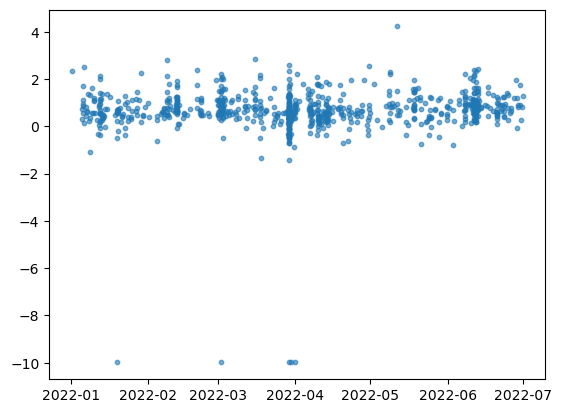

In [60]:
times = ys_arrs_evs[ys_arrs_evs['origin_time'] > unix2022].apply(lambda x: datetime.fromtimestamp(x['origin_time'], tz=timezone.utc), axis=1)
fig, ax = plt.subplots(1)
ax.scatter(times, ys_arrs_evs[ys_arrs_evs['origin_time'] >  unix2022]['magnitude'], s=10.0, alpha=0.6)
ax.xaxis_date()

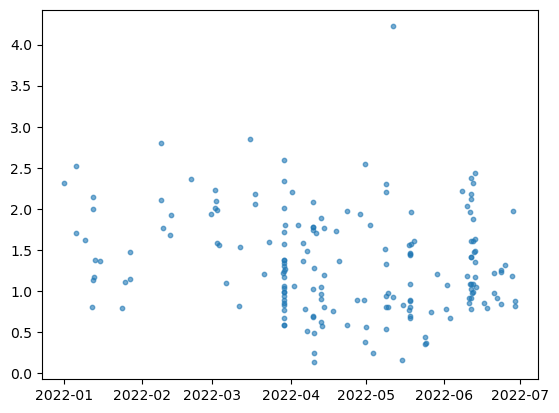

In [61]:
times = ys_arrs_evs[(ys_arrs_evs['origin_time'] > unix2022) & (ys_arrs_evs['magnitude_type'] == 'l')].apply(lambda x: datetime.fromtimestamp(x['origin_time'], tz=timezone.utc), axis=1)
fig, ax = plt.subplots(1)
ax.scatter(times, ys_arrs_evs[(ys_arrs_evs['origin_time'] > unix2022) & (ys_arrs_evs['magnitude_type'] == 'l')]['magnitude'], s=10.0, alpha=0.6)
ax.xaxis_date()

## Grizzly Lake Area

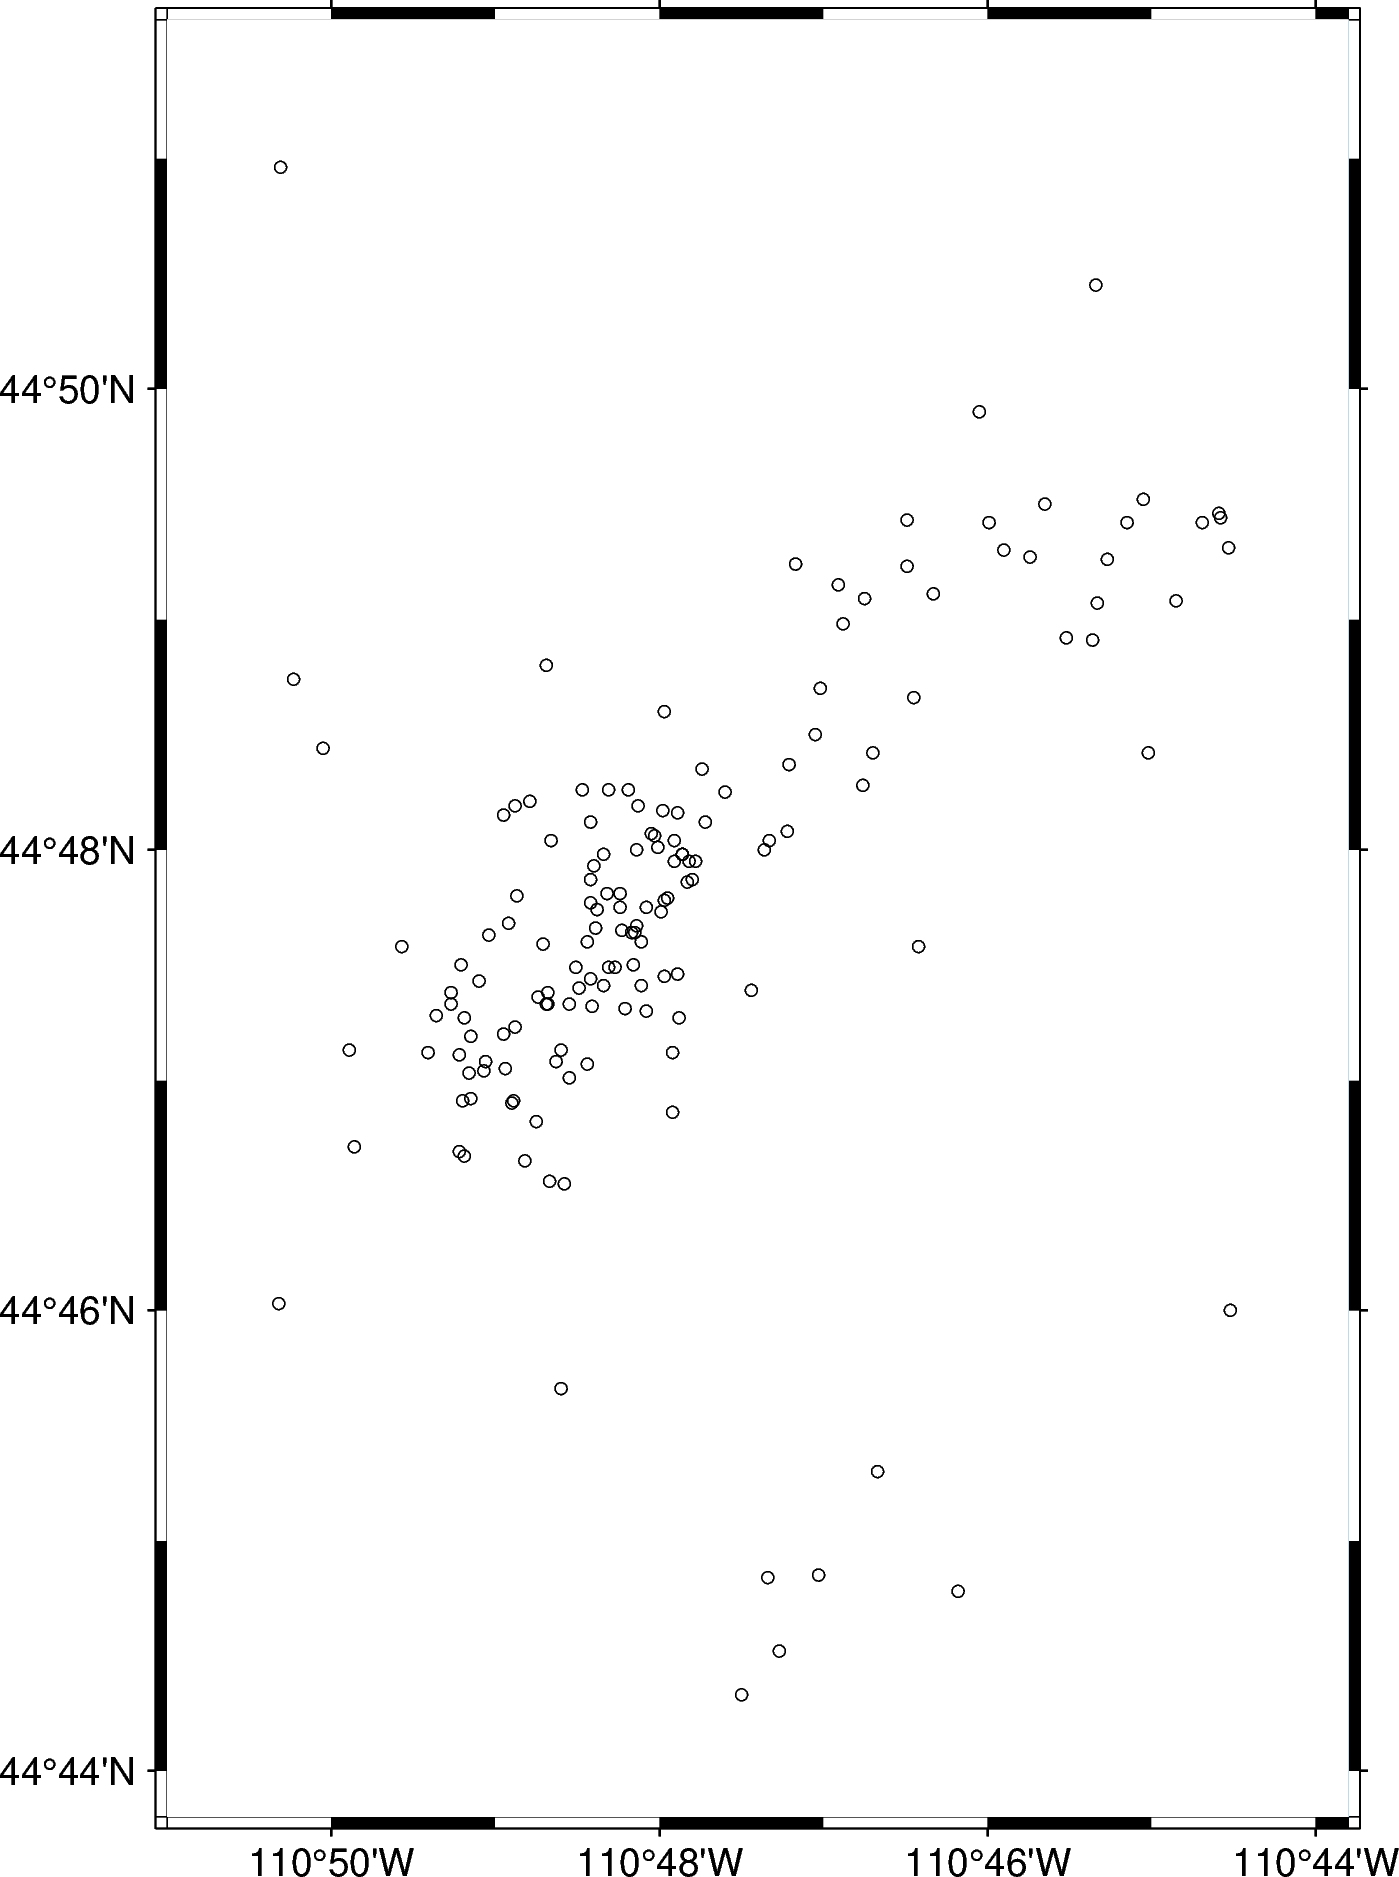

In [48]:
#Draw event map 
gl_region = [
-110.850,
-110.73,
44.73,
44.86,
]

fig = pygmt.Figure()
fig.basemap(region=gl_region, projection="M10c", frame=True)
fig.coast(land="white", borders=2, water="skyblue")
fig.plot(data=ys_arrs_evs[ys_arrs_evs['origin_time'] > unix2022][['event_lon', 'event_lat']], style="c0.1c")
fig.show()

In [62]:
gl_evs = ys_arrs_evs[(ys_arrs_evs.event_lon >= gl_region[0]) & (ys_arrs_evs.event_lon <= gl_region[1]) & 
                     (ys_arrs_evs.event_lat >= gl_region[2]) & (ys_arrs_evs.event_lat <= gl_region[3])]

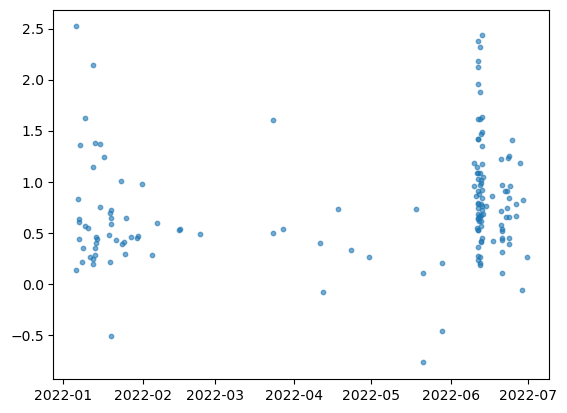

In [71]:
times = gl_evs[gl_evs['origin_time'] > unix2022].apply(lambda x: datetime.fromtimestamp(x['origin_time'], tz=timezone.utc), axis=1)
fig, ax = plt.subplots(1)
ax.scatter(times, gl_evs[gl_evs['origin_time'] > unix2022]['magnitude'], s=10.0, alpha=0.6)
ax.xaxis_date()

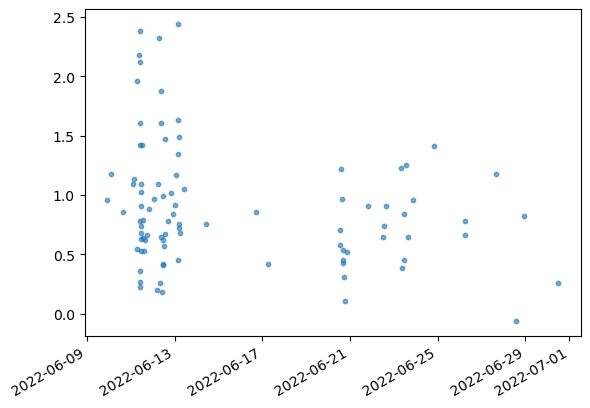

In [74]:
times = gl_evs[(gl_evs['origin_time'] >= datetime(2022, 6, 1, tzinfo=timezone.utc).timestamp()) & 
               (gl_evs['origin_time'] < datetime(2022, 7, 1, tzinfo=timezone.utc).timestamp())].apply(lambda x: datetime.fromtimestamp(x['origin_time'], tz=timezone.utc), axis=1)
fig, ax = plt.subplots(1)
ax.scatter(times, gl_evs[(gl_evs['origin_time'] >= datetime(2022, 6, 1, tzinfo=timezone.utc).timestamp()) & 
                            (gl_evs['origin_time'] < datetime(2022, 7, 1, tzinfo=timezone.utc).timestamp())]['magnitude'], s=10.0, alpha=0.6)
ax.xaxis_date()
fig.autofmt_xdate()

In [73]:
gl_evs[(gl_evs.origin_time > datetime(2022, 6, 11, tzinfo=timezone.utc).timestamp()) & (gl_evs.origin_time < datetime(2022, 6, 13, tzinfo=timezone.utc).timestamp())].shape

(46, 13)